In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Handling missing values

The missing values in attribute "stalk root" were handled by filling mode

# Experimenting with data

Values of K in the range 3 to 11 were tried. Accuracy score was obtained as 100% in each case 

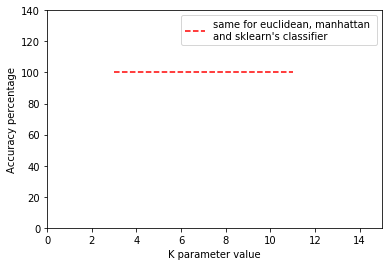

<Figure size 1440x1224 with 0 Axes>

In [2]:
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [100, 100, 100, 100, 100, 100, 100, 100, 100], 'r--', label="same for euclidean, manhattan \nand sklearn's classifier")
plt.legend(loc='best')
plt.axis([0, 15, 0, 140])
plt.xlabel('K parameter value')
plt.ylabel('Accuracy percentage')
plt.figure(figsize=(20,17))
plt.show()

## Metrics obtained

#### F1 score

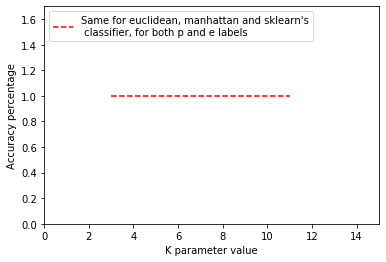

<Figure size 720x504 with 0 Axes>

In [3]:
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 1, 1, 1, 1, 1, 1, 1, 1], 'r--', label="Same for euclidean, manhattan and sklearn's\n classifier, for both p and e labels")
plt.legend(loc='upper right')
plt.axis([0, 15, 0, 1.7])
plt.xlabel('K parameter value')
plt.ylabel('Accuracy percentage')
plt.legend(loc="upper left")
plt.figure(figsize=(10,7))
plt.show()

### Confusion matrix for K = 5

$$\begin{bmatrix} 505 & 0 \\ 0 & 495 \end{bmatrix}$$

### Random guessing

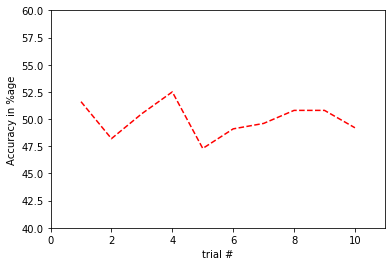

In [4]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [51.6, 48.2, 50.5, 52.5, 47.3, 49.1, 49.6, 50.8, 50.8, 49.2], 'r--')
plt.axis([0, 11, 40, 60])
plt.xlabel('trial #')
plt.ylabel('Accuracy in %age')
# plt.figure(figsize=(10,7))
plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# -*- coding: utf-8 -*-
"""q2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Tnp5ir4kFPDvG1qGfpOZD4w5lPTWvEur
"""

# from google.colab import drive
# from google.colab import files
# drive.mount('/content/gdrive')

class KNNClassifier:

    def __init__(self, k_value=5):
        self.k_parameter = k_value
        self.data_arr = None
        self.train_res = None

    def complete_df(self, df):
        chars ={1: {'b', 'c', 'f', 'k', 's', 'x'},
        2: {'f', 'g', 's', 'y'},
        3: {'b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y', 't', 'f'},
        4: {'f', 't'},
        5: {'a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'},
        6: {'a', 'f', 'd', 'n'},
        7: {'c', 'w', 'd'},
        8: {'b', 'n'},
        9: {'b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'},
        10: {'e', 't'},
        11: {'b', 'c', 'u', 'e', 'r', 'z'},
        12: {'f', 'k', 's', 'y'},
        13: {'f', 'k', 's', 'y'},
        14: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        15: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        16: {'p', 'u'},
        17: {'n', 'o', 'w', 'y'},
        18: {'n', 'o', 't'},
        19: {'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'},
        20: {'b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'},
        21: {'a', 'c', 'n', 's', 'v', 'y'},
        22: {'d', 'g', 'l', 'm', 'p', 'u', 'w'}}

        extra=0
        last_index = df.shape[0]-1
        for col in range(df.shape[1]):
            value_set = set(df.iloc[:,col])
            diff_set = chars[col+1] - value_set
            if(len(diff_set)):
                extra += len(diff_set)
                for ele in diff_set:
                    temp_df = pd.DataFrame(columns=df.columns)
                    temp_df = temp_df.append(df.iloc[last_index,:])
                    temp_df.iloc[0,col] = ele
                    df = df.append(temp_df)
        df = pd.get_dummies(df)
        df = df.iloc[0:len(df)-extra,:]
        return df

    def preprocess_dataframe(self, df):
        mode_list = list(df.mode().iloc[0].to_numpy())
        for col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
            for ind in range(len(df)):
                if df.iloc[ind][col] == '?' or df.iloc[ind][col] == 'NA':
                    df.iloc[ind][col] = mode_list[int(col)-1]
        return self.complete_df(df)

    def train(self, train_df):
        # train_df = pd.read_csv(train_dataframe_path, header=None)    
        self.train_res = train_df.iloc[:,0]
        n_f = train_df.drop(train_df.columns[0], axis=1, inplace=False)
        train_df = self.preprocess_dataframe(n_f)
        self.data_arr = train_df.to_numpy()

    def predict(self, test_df):
        # test_df = pd.read_csv(test_dataframe_path, header=None)
        test_df.columns = [ str(i) for i in range(1, test_df.shape[1]+1)]
        test_df = self.preprocess_dataframe(test_df)
        test_egs = test_df.to_numpy()
        prediction_list = []
        for test_ind in range(test_egs.shape[0]):
            lis = []
            test_row = test_egs[test_ind,:]
            hashmap = {'p':0, 'e':0}
            for train_ind in range(self.data_arr.shape[0]):
                train_row = self.data_arr[train_ind,:]
                diff = test_row - train_row
                diff = diff*diff
                dist = (diff.sum())
                lis.append([dist, self.train_res[train_ind]])
                lis = sorted(lis, key=lambda pair:pair[0])
                lis = lis[0:self.k_parameter]
            for pair in lis:
                hashmap[pair[1]] += 1
            if hashmap['p'] > hashmap['e']:
                ind = 'p'
            else:
                ind = 'e'
            prediction_list.append(ind)
        return prediction_list

# -*- coding: utf-8 -*-
"""q2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Tnp5ir4kFPDvG1qGfpOZD4w5lPTWvEur
"""

# from google.colab import drive
# from google.colab import files
# drive.mount('/content/gdrive')

class KNNClassifier_man:

    def __init__(self, k_value=5):
        self.k_parameter = k_value
        self.data_arr = None
        self.train_res = None

    def complete_df(self, df):
        chars ={1: {'b', 'c', 'f', 'k', 's', 'x'},
        2: {'f', 'g', 's', 'y'},
        3: {'b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y', 't', 'f'},
        4: {'f', 't'},
        5: {'a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'},
        6: {'a', 'f', 'd', 'n'},
        7: {'c', 'w', 'd'},
        8: {'b', 'n'},
        9: {'b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'},
        10: {'e', 't'},
        11: {'b', 'c', 'u', 'e', 'r', 'z'},
        12: {'f', 'k', 's', 'y'},
        13: {'f', 'k', 's', 'y'},
        14: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        15: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        16: {'p', 'u'},
        17: {'n', 'o', 'w', 'y'},
        18: {'n', 'o', 't'},
        19: {'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'},
        20: {'b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'},
        21: {'a', 'c', 'n', 's', 'v', 'y'},
        22: {'d', 'g', 'l', 'm', 'p', 'u', 'w'}}

        extra=0
        last_index = df.shape[0]-1
        for col in range(df.shape[1]):
            value_set = set(df.iloc[:,col])
            diff_set = chars[col+1] - value_set
            if(len(diff_set)):
                extra += len(diff_set)
                for ele in diff_set:
                    temp_df = pd.DataFrame(columns=df.columns)
                    temp_df = temp_df.append(df.iloc[last_index,:])
                    temp_df.iloc[0,col] = ele
                    df = df.append(temp_df)
        df = pd.get_dummies(df)
        df = df.iloc[0:len(df)-extra,:]
        return df

    def preprocess_dataframe(self, df):
        mode_list = list(df.mode().iloc[0].to_numpy())
        for col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
            for ind in range(len(df)):
                if df.iloc[ind][col] == '?' or df.iloc[ind][col] == 'NA':
                    df.iloc[ind][col] = mode_list[int(col)-1]
        return self.complete_df(df)

    def train(self, train_df):
        # train_df = pd.read_csv(train_dataframe_path, header=None)    
        self.train_res = train_df.iloc[:,0]
        n_f = train_df.drop(train_df.columns[0], axis=1, inplace=False)
        train_df = self.preprocess_dataframe(n_f)
        self.data_arr = train_df.to_numpy()

    def predict(self, test_df):
        # test_df = pd.read_csv(test_dataframe_path, header=None)
        test_df.columns = [ str(i) for i in range(1, test_df.shape[1]+1)]
        test_df = self.preprocess_dataframe(test_df)
        test_egs = test_df.to_numpy()
        prediction_list = []
        for test_ind in range(test_egs.shape[0]):
            lis = []
            test_row = test_egs[test_ind,:]
            hashmap = {'p':0, 'e':0}
            for train_ind in range(self.data_arr.shape[0]):
                train_row = self.data_arr[train_ind,:]
                diff = test_row - train_row
                diff = np.absolute(diff)
                dist = (diff.sum())
                lis.append([dist, self.train_res[train_ind]])
                lis = sorted(lis, key=lambda pair:pair[0])
                lis = lis[0:self.k_parameter]
            for pair in lis:
                hashmap[pair[1]] += 1
            if hashmap['p'] > hashmap['e']:
                ind = 'p'
            else:
                ind = 'e'
            prediction_list.append(ind)
        return prediction_list

def complete_df(df):
        chars ={1: {'b', 'c', 'f', 'k', 's', 'x'},
        2: {'f', 'g', 's', 'y'},
        3: {'b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y', 't', 'f'},
        4: {'f', 't'},
        5: {'a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'},
        6: {'a', 'f', 'd', 'n'},
        7: {'c', 'w', 'd'},
        8: {'b', 'n'},
        9: {'b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'},
        10: {'e', 't'},
        11: {'b', 'c', 'u', 'e', 'r', 'z'},
        12: {'f', 'k', 's', 'y'},
        13: {'f', 'k', 's', 'y'},
        14: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        15: {'b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'},
        16: {'p', 'u'},
        17: {'n', 'o', 'w', 'y'},
        18: {'n', 'o', 't'},
        19: {'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'},
        20: {'b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'},
        21: {'a', 'c', 'n', 's', 'v', 'y'},
        22: {'d', 'g', 'l', 'm', 'p', 'u', 'w'}}

        extra=0
        last_index = df.shape[0]-1
        for col in range(df.shape[1]):
            value_set = set(df.iloc[:,col])
            diff_set = chars[col+1] - value_set
            if(len(diff_set)):
                extra += len(diff_set)
                for ele in diff_set:
                    temp_df = pd.DataFrame(columns=df.columns)
                    temp_df = temp_df.append(df.iloc[last_index,:])
                    temp_df.iloc[0,col] = ele
                    df = df.append(temp_df)
        df = pd.get_dummies(df)
        df = df.iloc[0:len(df)-extra,:]
        return df

def preprocess_dataframe(df):
    mode_list = list(df.mode().iloc[0].to_numpy())
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        for ind in range(len(df)):
            if df.iloc[ind][col] == '?' or df.iloc[ind][col] == 'NA':
                df.iloc[ind][col] = mode_list[int(col)-1]
    return complete_df(df)

euclid_accuracy_self = []
man_accuracy_self = []
accuracy_sklearn = []
train_df = pd.read_csv("./Datasets/q2/train.csv", header=None)
res = train_df.iloc[:,0]
test_df = pd.read_csv("./Datasets/q2/test.csv", header=None)
test_labels = pd.read_csv("./Datasets/q2/test_labels.csv", header=None)
temp = preprocess_dataframe(train_df.drop(train_df.columns[0], axis=1, inplace=False))
test_df.columns = [ str(i) for i in range(1, test_df.shape[1]+1)]
temp2 = preprocess_dataframe(test_df)
# print(temp.shape)
# print(temp2.shape)
for k in range(3, 12):
    print("k = "+str(k))
    sk_class = KNeighborsClassifier(k)
    sk_class.fit(temp, res)
#     print(preprocess_dataframe(test_df).shape)
    pl = sk_class.predict(temp2)
#     print(pl)
#     print(test_labels)
    accuracy_sklearn.append(accuracy_score(test_labels, pl))
#     print(list(test_labels))
#     print(pl)
    print("F1 score p"+str(f1_score(test_labels, pl, average='binary', pos_label='p')))
    print("F1 score e"+str(f1_score(test_labels, pl, average='binary', pos_label='e')))
    cfr = KNNClassifier(k)
    cfr.train(train_df)
    pl = cfr.predict(test_df)
    euclid_accuracy_self.append(accuracy_score(test_labels, pl))
    print("F1 score p"+str(f1_score(test_labels, pl, average='binary', pos_label='p')))
    print("F1 score e"+str(f1_score(test_labels, pl, average='binary', pos_label='e')))
    if k==5:
        print(confusion_matrix(test_labels, pl))
    cfr = KNNClassifier_man(k)
    cfr.train(train_df)
    pl = cfr.predict(test_df)
    man_accuracy_self.append(accuracy_score(test_labels, pl))
    print("F1 score p"+str(f1_score(test_labels, pl, average='binary', pos_label='p')))
    print("F1 score e"+str(f1_score(test_labels, pl, average='binary', pos_label='e')))

print(euclid_accuracy_self)
print(man_accuracy_self)
print(accuracy_sklearn)

acc_list = []
for trial in range(10):
    random_list = np.random.randint(0,2, size=len(test_labels))
    random_pred = ['p' if x==0 else 'e' for x in random_list]
    acc_list.append(accuracy_score(test_labels, random_pred))

print(acc_list)

k = 3
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 4
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 5
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
[[505   0]
 [  0 495]]
F1 score p1.0
F1 score e1.0
k = 6
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 7
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 8
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 9
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 10
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
k = 11
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
F1 score p1.0
F1 score e1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.501, 0.503, 0.499, 0.484